# Proizvodnja električne energije iz VE

Prilikom procjene godišnje proizvodnje električne energije iz vjetroelektrana uzeti su u obzir satni podaci o brzini vjetra na 50 m visine na području Tomislavgrada (Gornji Brišnik za VE Mesihovina, te lokacija Jelovača) za 2019., 2020. i 2021. godinu, te za Podveležje za 2021. godinu, kada je VE Podveležje počela sa radom. Izvor podataka je https://power.larc.nasa.gov/data-access-viewer/ koji osim brzine vjetra na 50 m visine bilježe i brzinu vjetra na 10 m visine. Tehnički podaci o vjetroagregatima su dostupni na web stranicama u dijelu: Reference, te će biti nakndadno uneseni.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#%pip install seaborn 
import seaborn as sns

Meteorološki podaci za Tomislavgrad i Podveležje su spašeni u .xslx fajlovima. 

In [2]:
def open_the_file(name,num):
    file_x=pd.read_excel(name,sheet_name=num,header=0)
    return file_x

In [3]:
#otvaranje podataka

file2_jel=open_the_file(r"FILES\VJETAR\jel.xlsx",0)
file2_jel_2020=open_the_file(r"FILES\VJETAR\jel.xlsx",1)
file2_jel_2021=open_the_file(r"FILES\VJETAR\jel.xlsx",2)

file2_mes=open_the_file(r"FILES\VJETAR\mes.xlsx",0)
file2_mes_2020=open_the_file(r"FILES\VJETAR\mes.xlsx",1)
file2_mes_2021=open_the_file(r"FILES\VJETAR\mes.xlsx",2)

file2_podv_2021=open_the_file(r"FILES\VJETAR\podv_2021.xlsx",0)

Svi fajlovi su strukturirani kao naredni - prikazana prva 2 reda i sastoje se od satnih podataka za jednu godinu (cca. 8800 podataka koji se odnose na temperaturu zraka na visini od 2 m (T2M), brzini vjetra na visini od 10 m, i 50 m (WS10M i WS50M), te pravcu vjetra na 10 m visine (WD10M). Za svaki podatak su zabilježeni sat, dan, godina i mjesec.

In [4]:
file2_jel[file2_jel["WS50M"]!=file2_mes["WS50M"]].shape # Lokacije za Jelovaču i Mesihovinu se razlikuju po brzini vjetra U 8723 vrijednosti, dakle 
#nisu defaultne vrijednosti za Tomislavgrad u pitanju

(8723, 8)

In [5]:
file2_mes.head(10) #prvih 10 redovA

,YEAR,MO,DY,HR,T2M,WD10M,WS10M,WS50M
0,2019,1,1,0,-1.92,31.65,6.46,9.72
1,2019,1,1,1,-2.13,31.91,6.19,9.52
2,2019,1,1,2,-2.24,31.59,6.10,9.50
3,2019,1,1,3,-2.36,32.55,6.10,9.52
4,2019,1,1,4,-2.46,33.33,6.50,9.74
5,2019,1,1,5,-2.63,34.82,6.91,9.96
6,2019,1,1,6,-2.81,37.33,7.24,10.13
7,2019,1,1,7,-3.02,39.03,7.22,9.91
8,2019,1,1,8,-2.27,41.84,7.62,9.45
9,2019,1,1,9,-1.02,43.77,7.49,8.70


In [6]:
file2_jel.head(10)

,YEAR,MO,DY,HR,T2M,WD10M,WS10M,WS50M
0,2019,1,1,0,0.58,36.30,5.85,9.50
1,2019,1,1,1,0.44,34.24,5.62,9.39
2,2019,1,1,2,0.29,36.80,5.39,9.27
3,2019,1,1,3,-0.01,36.07,5.12,9.08
4,2019,1,1,4,-0.17,37.07,5.37,9.28
5,2019,1,1,5,-0.30,41.13,5.81,9.58
6,2019,1,1,6,-0.38,44.40,6.31,9.82
7,2019,1,1,7,-0.59,46.45,6.35,9.62
8,2019,1,1,8,0.41,49.43,6.80,9.22
9,2019,1,1,9,1.69,51.69,6.97,8.50


Lopatice vjetroturbina na obje lokacije su postavljene na nešto većim visinama, ali će se za dalji proračun uzeti **brzina vjetra na visini od 50 m.**
Statističke karakteristike svakog od fajlova se mogu prikazati putem funkcije **describe_file** koja kao argument uzima željeni fajl i daje statističke paramtere izračunate po kolonama.

2019.: Maksimalna brzina vjetra u Tomislavgradu dostiže oko 20,64 m/s na 50 m visine. Postoje određene sumnje u tačnost izvora podataka s obzirom na zabilježene podatke o minimumu temperatura (-12,3°C), mada se ona oko tih vrijednosti kreće i u 2020. i 2021. godini.Standardne devijacije brzine vjetra u oba kraja su značajne i ukazuju na njegovu promjenjivost. Minimalna brzina vjetra je 0,06 m/s. Prosječna brzina vjetra u 2019. je bila oko 4,7 m/s, sa standardnom devijacijom reda veličine srednje vrijednosti.  

2020.: Maksimalna brzina vjetra u Tomislavgradu dostiže oko 24,04 m/s na toj visini. Standardne devijacije brzine vjetra u oba kraja su značajne i ukazuju na njegovu promjenjivost.  Maksimalna brzina vjetra na ovoj lokaciji je oko 24 m/s, a minimalna 0,05 m/s. Prosječna brzina vjetra u 2020. je ostala slična onoj iz 2019. - 4,5 m/s, sa standardnom devijacijom reda veličine srednje vrijednosti.  

2021:Maksimalna brzina vjetra u Tomislavgradu dostiže oko 15,2 m/s na toj visini, a u Podveležju oko 15,1 m/s. Važno je istaći da tabela bilježi ekstremnu vrijednost minimuma brzine vjetra - 999 m/s, te će se ovaj podatak zamijeniti srednjom vrijednošću jer je u pitanju očita greška očitavanja. Za obje lokacije ova je pojava zabilježena 9.8.2021.

Intermitentnost električne energije iz VE je posmatrana u određenim studijama NOS BiH, u smislu sekundarne i tercijarne regulacije.

In [7]:
def describe_file(file):
        return(file[["T2M","WS10M","WS50M"]].describe())

In [8]:
print("Jelovača,2019")
print(describe_file(file2_jel))
print("Jelovača,2020")
print("\n",describe_file(file2_jel_2020))

print("Jelovača,2021")
print("\n",describe_file(file2_jel_2021))

Jelovača,2019
               T2M        WS10M        WS50M
count  8760.000000  8760.000000  8760.000000
mean     13.338697     3.738121     5.000908
std       8.709185     2.469298     3.125994
min      -7.670000     0.060000     0.020000
25%       7.107500     2.020000     2.700000
50%      12.595000     3.080000     4.190000
75%      19.730000     4.640000     6.650000
max      37.040000    18.220000    21.820000
Jelovača,2020

                T2M        WS10M        WS50M
count  8784.000000  8784.000000  8784.000000
mean     13.204096     3.578526     4.756144
std       8.202131     2.362431     3.012024
min      -4.700000     0.030000     0.020000
25%       6.800000     1.920000     2.520000
50%      12.150000     2.940000     4.050000
75%      19.000000     4.590000     6.470000
max      36.160000    18.480000    23.240000
Jelovača,2021

                T2M        WS10M        WS50M
count  8760.000000  8760.000000  8760.000000
mean     12.692026     3.631648     2.096131
std      

In [9]:
print("Mesihovina,2019")
print(describe_file(file2_mes))
print("Mesihovina,2020")
print("\n",describe_file(file2_mes_2020))

print("Mesihovina,2021")
print("\n",describe_file(file2_mes_2021))

Mesihovina,2019
               T2M        WS10M        WS50M
count  8760.000000  8760.000000  8760.000000
mean     10.921790     3.457708     4.658413
std       9.281895     2.401730     2.962694
min     -12.130000     0.060000     0.060000
25%       4.212500     1.850000     2.557500
50%      10.360000     2.710000     3.880000
75%      17.362500     4.370000     6.090000
max      36.940000    17.600000    20.640000
Mesihovina,2020

                T2M        WS10M        WS50M
count  8784.000000  8784.000000  8784.000000
mean     10.792801     3.364686     4.502746
std       8.813820     2.301233     2.862620
min      -8.030000     0.080000     0.050000
25%       3.940000     1.780000     2.400000
50%       9.780000     2.680000     3.830000
75%      16.770000     4.410000     6.060000
max      37.560000    19.410000    24.040000
Mesihovina,2021

                T2M        WS10M        WS50M
count  8760.000000  8760.000000  8760.000000
mean     10.118308     3.335952     1.738632
std

In [10]:
print("Podveležje,2021")
print("\n",describe_file(file2_podv_2021))

Podveležje,2021

                T2M        WS10M        WS50M
count  8760.000000  8760.000000  8760.000000
mean      8.607932     2.876906     1.342136
std       9.235117     1.745421    52.485363
min     -15.850000     0.030000  -999.000000
25%       1.837500     1.660000     2.390000
50%       7.790000     2.440000     3.740000
75%      15.272500     3.770000     5.350000
max      32.990000    11.290000    15.110000


Text(0.5, 1.0, 'Podveležje')

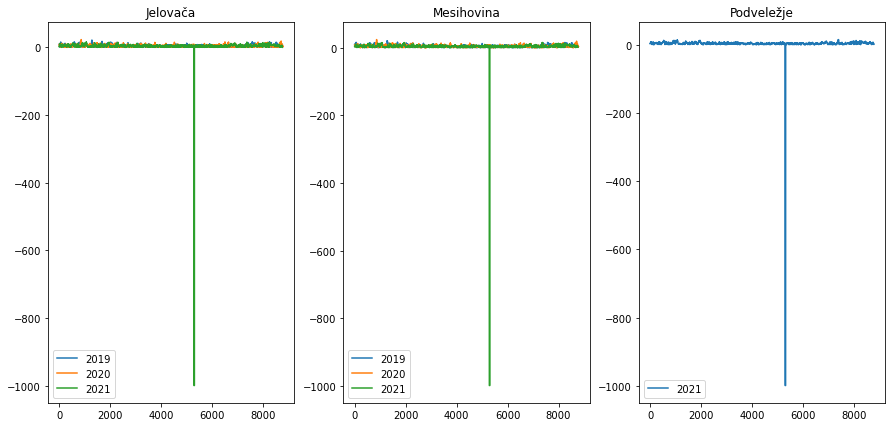

In [11]:

# anomalija 
fig,ax=plt.subplots(ncols=3,figsize=(15,7))

file2_jel["WS50M"].plot(label="2019", ax=ax[0])
file2_jel_2020["WS50M"].plot(label="2020", ax=ax[0])
file2_jel_2021["WS50M"].plot(label="2021", ax=ax[0])
ax[0].legend()
ax[0].set_title("Jelovača")

file2_mes["WS50M"].plot(label="2019", ax=ax[1])
file2_mes_2020["WS50M"].plot(label="2020", ax=ax[1])
file2_mes_2021["WS50M"].plot(label="2021", ax=ax[1])
ax[1].legend()
ax[1].set_title("Mesihovina")


file2_podv_2021["WS50M"].plot(label="2021", ax=ax[2])
ax[2].legend()
ax[2].set_title("Podveležje")

Anomalije će se zamijeniti sa srednjom brzinom vjetra u toku godine.

In [12]:
file2_jel_2021.loc[file2_jel_2021["WS50M"]<-800]=file2_jel_2021["WS50M"].mean()

In [13]:
file2_mes_2021.loc[file2_mes_2021["WS50M"]<-800].head(2)

,YEAR,MO,DY,HR,T2M,WD10M,WS10M,WS50M
5281,2021,8,9,1,19.98,124.32,1.97,-999.0
5282,2021,8,9,2,20.06,119.55,1.68,-999.0


In [14]:
file2_mes_2021.loc[file2_mes_2021["WS50M"]<-800]=file2_mes_2021["WS50M"].mean()#zamjena sa srednjom vrijednošću

In [15]:
file2_podv_2021.loc[file2_podv_2021["WS50M"]<-800].head(2)

,YEAR,MO,DY,HR,T2M,WD10M,WS10M,WS50M
5281,2021,8,9,1,18.48,168.23,1.72,-999.0
5282,2021,8,9,2,18.62,167.38,1.54,-999.0


In [16]:
file2_podv_2021.loc[file2_podv_2021["WS50M"]<-800]=file2_podv_2021["WS50M"].mean()

Text(0.5, 0, 'Sat')

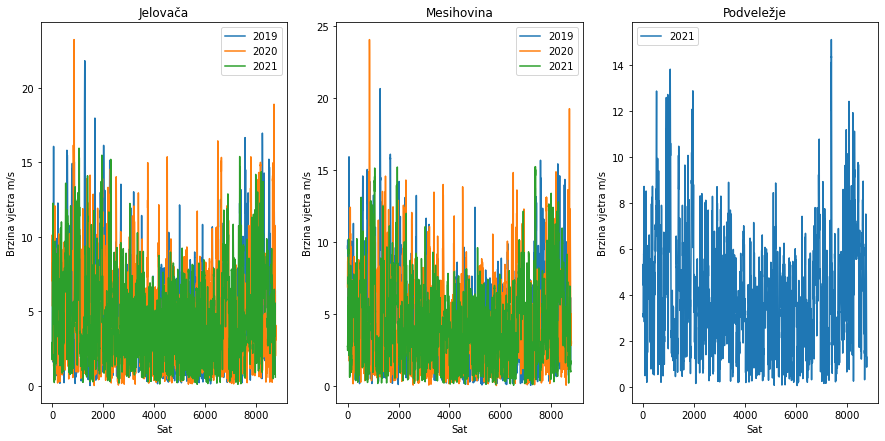

In [17]:
fig,ax=plt.subplots(ncols=3,figsize=(15,7))

file2_jel["WS50M"].plot(label="2019",ax=ax[0])
file2_jel_2020["WS50M"].plot(label="2020",ax=ax[0])
file2_jel_2021["WS50M"].plot(label="2021",ax=ax[0])
ax[0].legend()
ax[0].set_title("Jelovača")
ax[0].set_ylabel("Brzina vjetra m/s")
ax[0].set_xlabel("Sat")


file2_mes["WS50M"].plot(label="2019",ax=ax[1])
file2_mes_2020["WS50M"].plot(label="2020",ax=ax[1])
file2_mes_2021["WS50M"].plot(label="2021",ax=ax[1])
ax[1].legend()
ax[1].set_title("Mesihovina")
ax[1].set_ylabel("Brzina vjetra m/s")
ax[1].set_xlabel("Sat")


file2_podv_2021["WS50M"].plot(label="2021",ax=ax[2])
ax[2].legend()
ax[2].set_title("Podveležje")
ax[2].set_ylabel("Brzina vjetra m/s")
ax[2].set_xlabel("Sat")


Ako se uporede podaci samo za 2021. godinu na dvije lokacije, može se primijetiti da ekstremne vrijednosti brzine vjetra vuku raspodjele udesno (ekstremne vrijednosti u vidu tački na boxplotovima.)Opseg vrijednosti je sličan u oba slučaja.

Text(0.5, 1.0, 'Mesihovina')

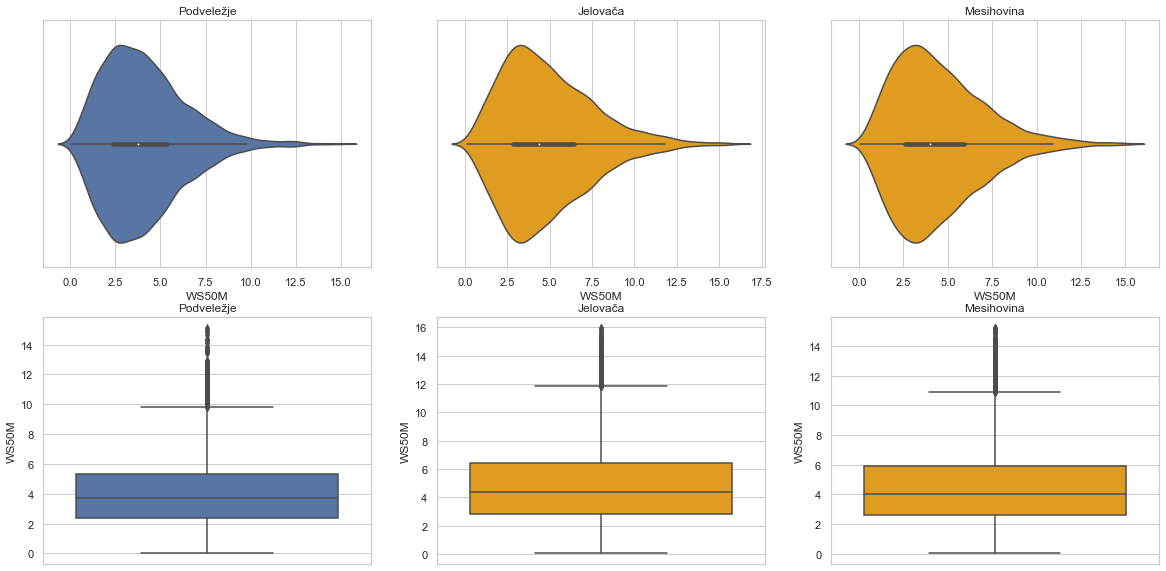

In [18]:
sns.set_theme(style="whitegrid")
fig, ax=plt.subplots(nrows=2,ncols=3, figsize=(20,10))

sns.violinplot(x=file2_podv_2021["WS50M"],ax=ax[0,0])
ax[0,0].set_title("Podveležje")

ax[0,1] = sns.violinplot(x=file2_jel_2021["WS50M"],ax=ax[0,1],color="orange")
ax[0,1].set_title("Jelovača")

ax[0,2] = sns.violinplot(x=file2_mes_2021["WS50M"],ax=ax[0,2],color="orange")
ax[0,2].set_title("Mesihovina")



sns.boxplot(y=file2_podv_2021["WS50M"],ax=ax[1,0])
ax[1,0].set_title("Podveležje")

ax[1,0] = sns.boxplot(y=file2_jel_2021["WS50M"],ax=ax[1,1],color="orange")
ax[1,0].set_title("Jelovača")

ax[1,2] = sns.boxplot(y=file2_mes_2021["WS50M"],ax=ax[1,2],color="orange")
ax[1,2].set_title("Mesihovina")

(0.0, 9222.15)

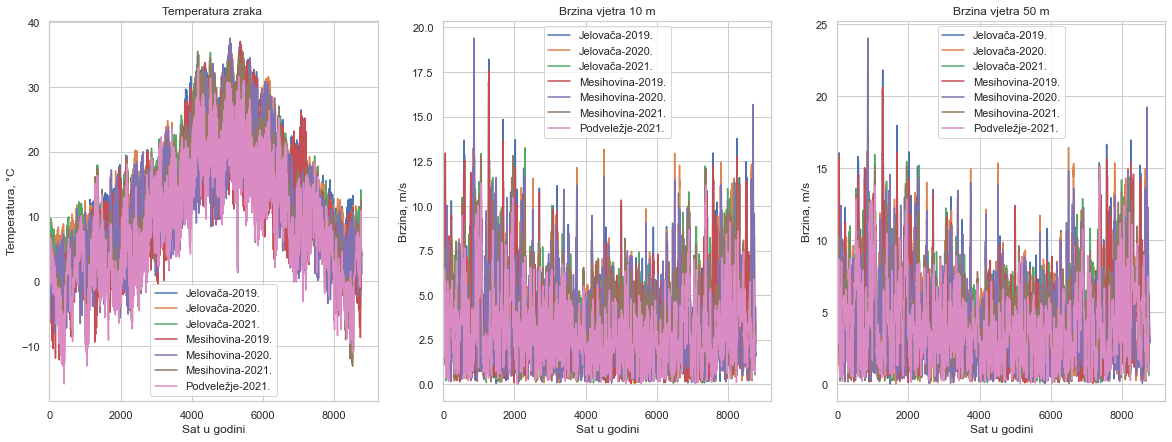

In [19]:
fig, ax=plt.subplots(ncols=3, figsize=(20,7))
file_names=[file2_jel,file2_jel_2020,file2_jel_2021,file2_mes,file2_mes_2020,file2_mes_2021,file2_podv_2021]
cities=["Jelovača-2019.","Jelovača-2020.","Jelovača-2021.","Mesihovina-2019.","Mesihovina-2020.","Mesihovina-2021.","Podveležje-2021."]


[i['T2M'].plot(ax=ax[0],label=cities[k]) for k,i in enumerate(file_names) ]
ax[0].set_title("Temperatura zraka ")
ax[0].set_xlabel("Sat u godini")
ax[0].set_ylabel("Temperatura, °C")
ax[0].legend()
ax[0].set_xlim(0)

[i["WS10M"].plot(ax=ax[1],label=cities[k]) for k,i in enumerate(file_names) ]
ax[1].set_title("Brzina vjetra 10 m")
ax[1].set_xlabel("Sat u godini")
ax[1].set_ylabel("Brzina, m/s")
ax[1].legend()
ax[1].set_xlim(0)

[i["WS50M"].plot(ax=ax[2],label=cities[k]) for k,i in enumerate(file_names) ]
ax[2].set_title("Brzina vjetra 50 m")
ax[2].set_xlabel("Sat u godini")
ax[2].set_ylabel("Brzina, m/s")
ax[2].legend()
ax[2].set_xlim(0)


Na internetu su pronađeni podaci za krivu snage za vjetroturbine tip Siemens SWT-2.3-108 snage 2,3 MW. Na lokaciji VE Mesihovina instalisana su 22 ovakva vjetroagregata. Za lokaciju VE Jelovača nije pronađen tačan tip vjetroturbina, osim što je poznat podatak da je instalisana snaga po vjetroagregatu 2 MW. Za krivu snage je uzet tip Siemens Gamesa G114-2.0 MW. Na ovoj lokaciji je instalirano 18 vjetroagregata.
Na lokaciji Podveležje je instalirano 15 vjetroagregata tipa Siemens SWT-3.2-113, te je preuzeta njena kriva snage

In [20]:
#Mesihovina
x=np.arange(3,20.5,0.5)
y=27,58,92,157,225,374,524,722,919,1155,1389,1670,1947,2163,2243,2273,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300
#Jelovača
x2=np.arange(3,26,1)
y2=[32,146,342,621,1008,1486,1836,1965,1994,1999,2000,2000,2000,2000,2000,2000,2000,2000,2000,1906,1681,1455,1230]

#mostar
xm=np.arange(3,23,1)
ym=64,169,350,623,1004,1506,2115,2712,3083,3187,3199,3200,3200,3200,3200,3200,3200,3200,3200,3200

Text(0.5, 1.0, 'Siemens SWT-3.2-113')

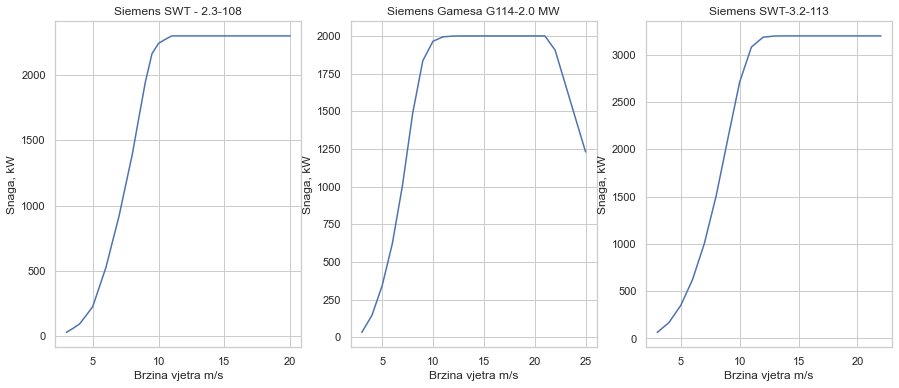

In [21]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15,6))
ax1.plot(x,y)
ax1.set_xlabel("Brzina vjetra m/s")
ax1.set_ylabel("Snaga, kW")
ax1.set_title ("Siemens SWT - 2.3-108")


ax2.plot(x2,y2)
ax2.set_xlabel("Brzina vjetra m/s")
ax2.set_ylabel("Snaga, kW")
ax2.set_title ("Siemens Gamesa G114-2.0 MW")

ax3.plot(xm,ym)
ax3.set_xlabel("Brzina vjetra m/s")
ax3.set_ylabel("Snaga, kW")
ax3.set_title ("Siemens SWT-3.2-113")

Za Siemens SWT - 2.3-108 podaci o snazi na krivoj su dati za korak brzine vjetra od 0.5 m/s a za Siemens Gamesa G114-2.0 MW u koraku od 1.0 m/s. Kako bi se ovi podaci povezali sa brzinama vjetra iz meteorološke baze, izvršit će se linearna interpolacije kako bi se dobila snaga vjetroagregata pri brzinama npr. 3.1 m/s, 3.2 m/s i sl.

In [22]:
def lin_interpolate_power(array1,array2,array3):
    inter=np.interp(array1,array2,array3)
    return inter

In [23]:
#Mesihovina
x_wind=np.arange(3.0,20.5,0.1)
y_power=lin_interpolate_power(x_wind, x, y)

#Jelovača

x_wind2=np.arange(3.0,25.1,0.1)
y_power2=lin_interpolate_power(x_wind2, x2, y2)

#Podveležje

x_windm=np.arange(3.0,22.1,0.1)
y_powerm=lin_interpolate_power(x_windm, xm, ym)

Text(0.5, 0, 'Brzina vjetra, m/s')

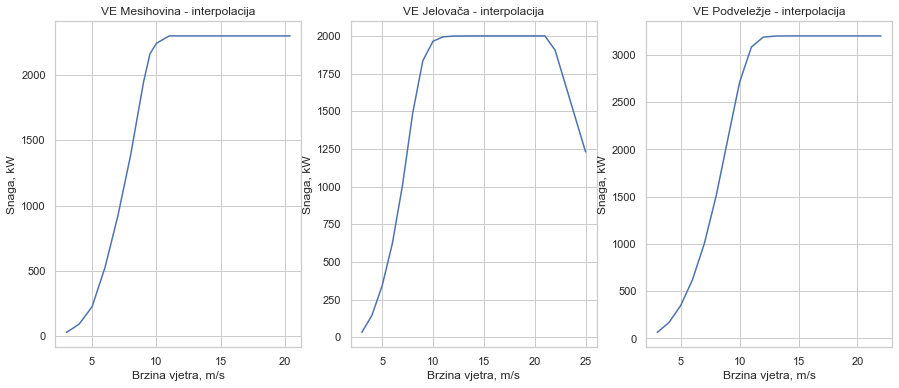

In [24]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15,6))

ax1.plot(x_wind,y_power)
ax1.set_title("VE Mesihovina - interpolacija")
ax1.set_ylabel("Snaga, kW")
ax1.set_xlabel("Brzina vjetra, m/s")

ax2.plot(x_wind2,y_power2)
ax2.set_title("VE Jelovača - interpolacija")
ax2.set_ylabel("Snaga, kW")
ax2.set_xlabel("Brzina vjetra, m/s")

#
ax3.plot(x_windm,y_powerm)
ax3.set_title("VE Podveležje - interpolacija")
ax3.set_ylabel("Snaga, kW")
ax3.set_xlabel("Brzina vjetra, m/s")

Sada će se izračunati snaga za vjetroagregate pri brzinama vjetra koje su zabilježene u meterološkim podacima na visini od 50 m/s. Podaci će se prije toga zaokružiti na jednu decimalu. Svakoj brzini vjetra će se pridružiti interpolirana snaga u kW dobivena u prethodnim koracima.

In [25]:
#zaokruživanje na jednu decimalu
wind_jel=round(file2_jel[["WS10M","WS50M"]],1)
wind_jel_2020=round(file2_jel_2020[["WS10M","WS50M"]],1)
wind_jel_2021=round(file2_jel_2021[["WS10M","WS50M"]],1)

wind_mes=round(file2_mes[["WS10M","WS50M"]],1)
wind_mes_2020=round(file2_mes_2020[["WS10M","WS50M"]],1)
wind_mes_2021=round(file2_mes_2021[["WS10M","WS50M"]],1)

wind_podv_2021=round(file2_podv_2021[["WS10M","WS50M"]],1)

#wind_mo_2021=round(file1_mostar_2021[["WS10M","WS50M"]],1)

In [26]:
wind_jel=wind_jel.assign(P50M_Jel=0)
wind_jel_2020=wind_jel_2020.assign(P50M_Jel=0)
wind_jel_2021=wind_jel_2021.assign(P50M_Jel=0)


wind_mes=wind_mes.assign(P50M_Mesih=0)
wind_mes_2020=wind_mes_2020.assign(P50M_Mesih=0)
wind_mes_2021=wind_mes_2021.assign(P50M_Mesih=0)

#wind_mo=wind_tom.assign(P50M_Podv=0)
wind_podv_2021=wind_podv_2021.assign(P50M_Podv=0)

In [27]:
def float_and_round (array1):
    array1=np.float64(np.asarray(array1))
    array1=np.round(array1,1)
    return array1

In [28]:
x_wind=float_and_round(x_wind)
x_wind2=float_and_round(x_wind2)

x_windm=float_and_round(x_windm)
for value,value2 in zip(x_wind,y_power):
    wind_mes.loc[wind_mes["WS50M"]==value,"P50M_Mesih"]=value2
    wind_mes_2020.loc[wind_mes_2020["WS50M"]==value,"P50M_Mesih"]=value2
    wind_mes_2021.loc[wind_mes_2021["WS50M"]==value,"P50M_Mesih"]=value2
    
    
for value,value2 in zip(x_wind2,y_power2):
    wind_jel.loc[wind_jel["WS50M"]==value,"P50M_Jel"]=value2
    wind_jel_2020.loc[wind_jel_2020["WS50M"]==value,"P50M_Jel"]=value2
    wind_jel_2021.loc[wind_jel_2021["WS50M"]==value,"P50M_Jel"]=value2

for value,value2 in zip(x_windm,y_powerm):
    wind_podv_2021.loc[wind_podv_2021["WS50M"]==value,"P50M_Podv"]=value2

In [29]:
wind_mes.head(3) #2019 #prva 3 reda

,WS10M,WS50M,P50M_Mesih
0,6.5,9.7,2195.0
1,6.2,9.5,2163.0
2,6.1,9.5,2163.0


In [30]:
wind_mes_2020.head(3) #2020

,WS10M,WS50M,P50M_Mesih
0,3.6,6.9,879.6
1,4.3,7.7,1248.6
2,4.8,8.0,1389.0


In [31]:
wind_mes_2021.head(3) #2021

,WS10M,WS50M,P50M_Mesih
0,1.6,2.8,0.0
1,1.6,2.8,0.0
2,1.6,2.6,0.0


In [32]:
wind_podv_2021.head(3)

,WS10M,WS50M,P50M_Podv
0,1.7,3.2,85.0
1,1.7,3.1,74.5
2,1.7,3.0,64.0


In [33]:
file2_podv_2021[(file2_podv_2021["MO"]==3)&(file2_podv_2021["DY"]==1)].index

Int64Index([1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426,
            1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437,
            1438, 1439],
           dtype='int64')

Text(0.5, 1.0, '2021.')

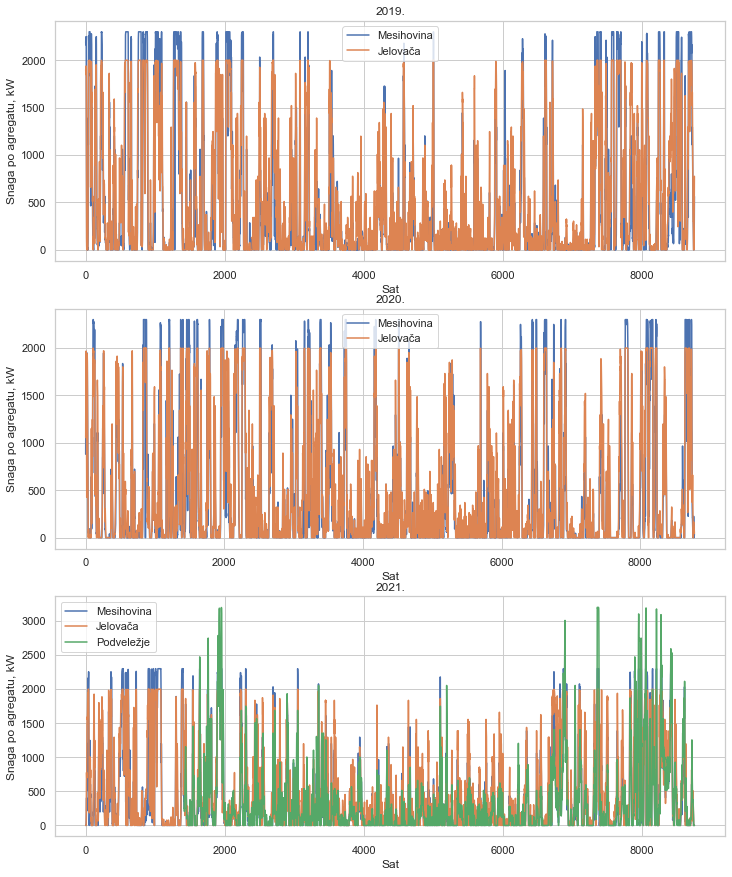

In [34]:
fig,ax=plt.subplots(nrows=3,figsize=(12,15))

wind_mes["P50M_Mesih"].plot(label="Mesihovina",ax=ax[0])
wind_jel["P50M_Jel"].plot(label="Jelovača",ax=ax[0])
ax[0].legend()
ax[0].set_xlabel("Sat")
ax[0].set_ylabel("Snaga po agregatu, kW")
ax[0].set_title("2019.")

wind_mes_2020["P50M_Mesih"].plot(label="Mesihovina",ax=ax[1])
wind_jel_2020["P50M_Jel"].plot(label="Jelovača",ax=ax[1])
ax[1].legend()
ax[1].set_xlabel("Sat")
ax[1].set_ylabel("Snaga po agregatu, kW")
ax[1].set_title("2020.")


wind_mes_2021["P50M_Mesih"].plot(label="Mesihovina",ax=ax[2])
wind_jel_2021["P50M_Jel"].plot(label="Jelovača",ax=ax[2])
wind_podv_2021["P50M_Podv"][1416:].plot(label="Podveležje",ax=ax[2])
ax[2].legend()
ax[2].set_xlabel("Sat")
ax[2].set_ylabel("Snaga po agregatu, kW")
ax[2].set_title("2021.")


Sada se može izračunati godišnja proizvodnja električne energije iz vjetroelektrana, s tim da se za VE Podveležje podaci uzimaju od 1.3.2021. - indeks 1416. Dobiveni rezultati su niži od onih koje izvještava NOS BiH, s tim da, osim tačnosti izvora meteorloških podataka, ulogu igra i visina vjetrotrubina, s obzirom da su one više od 50 m gdje je data brzina vjetra. Na višim visinama su veće i brzine vjetra, ali isto tako, vjerovatnoća je veća da će biti više slučajeva kada se dostiže "cut off" brzina pri kojoj agregat prestaje sa radom. U stvarnosti, satna rezolucija bi se mogla skalirati prema ukupnoj godišnjoj proizvodnji iz VE za 2019.(253,7 GWh) 2020.(261,8 GWh) i 2021.godinu koju izvještava NOS BiH. Ovdje treba napomenuti i da prema energetskom bilansu FBiH iz 2019. stoji podatak da je godišnja proizvodnja iz VE 166 GWh, što je u tom slučaju blisko dobijenom rezultatu prilikom proračnu, ali se znatno razlikuje od podataka koje izvještava NOS BiH. Također, postoje manje VE u naselju Moštre kod Visokog i u Prozor-Rama, ali je njihov doprinos zanemariv u poređenju sa VE ovog kapaciteta.

In [35]:
ann_production_mes=wind_mes["P50M_Mesih"].sum()
ann_production_jel=wind_jel["P50M_Jel"].sum()

print("Godišnja proizvodnja po agregatu, Mesihovina:", ann_production_mes, "kWh")
print("Godišnja proizvodnja po agregatu, Jelovača: ", ann_production_jel, "kWh")
print("Broj agregata, Mesihovina:", 22)
print("Broj agregata, Jelovača: ", 18)
total_mes=(ann_production_mes*22)/1000000
total_jel=(ann_production_jel*18)/1000000
total_ve=total_mes+total_jel
print("Ukupna godišnja proizvodnja, Mesihovina:", total_mes, "GWh")
print("Ukupna godišnja proizvodnja, Jelovača: ", total_jel, "GWh")
print("Ukupna godišnja proizvodnja, VE: ", total_ve, "GWh")

Godišnja proizvodnja po agregatu, Mesihovina: 3970164.200000004 kWh
Godišnja proizvodnja po agregatu, Jelovača:  4675894.300000004 kWh
Broj agregata, Mesihovina: 22
Broj agregata, Jelovača:  18
Ukupna godišnja proizvodnja, Mesihovina: 87.34361240000008 GWh
Ukupna godišnja proizvodnja, Jelovača:  84.16609740000007 GWh
Ukupna godišnja proizvodnja, VE:  171.50970980000017 GWh


In [36]:
ann_production_mes=wind_mes_2020["P50M_Mesih"].sum()
ann_production_jel=wind_jel_2020["P50M_Jel"].sum()

print("Godišnja proizvodnja po agregatu, Mesihovina:", ann_production_mes, "kWh")
print("Godišnja proizvodnja po agregatu, Jelovača: ", ann_production_jel, "kWh")
print("Broj agregata, Mesihovina:", 22)
print("Broj agregata, Jelovača: ", 18)
total_mes=(ann_production_mes*22)/1000000
total_jel=(ann_production_jel*18)/1000000
total_ve=total_mes+total_jel
print("Ukupna godišnja proizvodnja, Mesihovina:", total_mes, "GWh")
print("Ukupna godišnja proizvodnja, Jelovača: ", total_jel, "GWh")
print("Ukupna godišnja proizvodnja, VE: ", total_ve, "GWh")

Godišnja proizvodnja po agregatu, Mesihovina: 3734440.000000004 kWh
Godišnja proizvodnja po agregatu, Jelovača:  4371560.200000004 kWh
Broj agregata, Mesihovina: 22
Broj agregata, Jelovača:  18
Ukupna godišnja proizvodnja, Mesihovina: 82.15768000000008 GWh
Ukupna godišnja proizvodnja, Jelovača:  78.68808360000007 GWh
Ukupna godišnja proizvodnja, VE:  160.84576360000017 GWh


In [37]:
ann_production_mes=wind_mes_2021["P50M_Mesih"].sum()
ann_production_jel=wind_jel_2021["P50M_Jel"].sum()
ann_production_mo=wind_podv_2021["P50M_Podv"][1416:].sum()
#ispraviti za datum polčetka 1.3.2021.
print("Godišnja proizvodnja po agregatu, Mesihovina:", ann_production_mes, "kWh")
print("Godišnja proizvodnja po agregatu, Jelovača: ", ann_production_jel, "kWh")
print("Godišnja proizvodnja po agregatu, Podveležje: ", ann_production_jel, "kWh")
print("Broj agregata, Mesihovina:", 22)
print("Broj agregata, Jelovača: ", 18)
print("Broj agregata, Podveležje: ", 18)
total_mes=(ann_production_mes*22)/1000000
total_jel=(ann_production_jel*18)/1000000
total_mo=(ann_production_mo*15)/1000000
total_ve=total_mes+total_jel+total_mo
print("Ukupna godišnja proizvodnja, Mesihovina:", total_mes, "GWh")
print("Ukupna godišnja proizvodnja, Jelovača: ", total_jel, "GWh")
print("Ukupna godišnja proizvodnja, Podveležje: ", total_mo, "GWh")
print("Ukupna godišnja proizvodnja, VE: ", total_ve, "GWh")

Godišnja proizvodnja po agregatu, Mesihovina: 3481312.200000004 kWh
Godišnja proizvodnja po agregatu, Jelovača:  4401362.600000004 kWh
Godišnja proizvodnja po agregatu, Podveležje:  4401362.600000004 kWh
Broj agregata, Mesihovina: 22
Broj agregata, Jelovača:  18
Broj agregata, Podveležje:  18
Ukupna godišnja proizvodnja, Mesihovina: 76.58886840000008 GWh
Ukupna godišnja proizvodnja, Jelovača:  79.22452680000008 GWh
Ukupna godišnja proizvodnja, Podveležje:  36.17020950000004 GWh
Ukupna godišnja proizvodnja, VE:  191.98360470000023 GWh


In [38]:
wind_tom=pd.DataFrame()
wind_tom_2020=pd.DataFrame()
wind_tom_2021=pd.DataFrame()
wind_tom["P50M_Total, GWh"]=(wind_mes["P50M_Mesih"]*22+wind_jel["P50M_Jel"]*18)/1000000
wind_tom_2020["P50M_Total, GWh"]=(wind_mes_2020["P50M_Mesih"]*22+wind_jel_2020["P50M_Jel"]*18)/1000000
wind_tom_2021["P50M_Total, GWh"]=(wind_mes_2021["P50M_Mesih"]*22+wind_jel_2021["P50M_Jel"]*18)/1000000
wind_tom_2021["P50M_Total, GWh"][1416:]=wind_tom_2021["P50M_Total, GWh"][1416:]+((wind_podv_2021["P50M_Podv"][1416:])*15)/1000000


In [39]:
wind_tom[["Year","Month","Day"]]=file2_mes[['YEAR', 'MO', 'DY']].copy()
wind_tom_2020[["Year","Month","Day"]]=file2_mes_2020[['YEAR', 'MO', 'DY']].copy()
wind_tom_2021[["Year","Month","Day"]]=file2_mes_2021[['YEAR', 'MO', 'DY']].copy()
wind_podv_2021[["Year","Month","Day"]]=file2_podv_2021[['YEAR', 'MO', 'DY']].copy()



Može se vidjeti da proizvodnja iz VE obično stagnira i najmanja je u periodu od 4. do 8. mjeseca, dok više vrijednosti bilježi početkom i krajem godine, s tim da se javlja jedna anomalija 2021. godine u mjesecu februaru. 

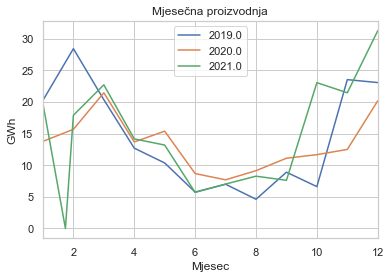

In [40]:
wind_tom.groupby("Month")["P50M_Total, GWh"].sum().plot(kind="line",title="Mjesečna proizvodnja",label=2019.)
wind_tom_2020.groupby("Month")["P50M_Total, GWh"].sum().plot(kind="line",title="Mjesečna proizvodnja", label=2020.)
wind_tom_2021.groupby("Month")["P50M_Total, GWh"].sum().plot(kind="line",title="Mjesečna proizvodnja",label=2021.)
plt.xlabel("Mjesec")
plt.ylabel("GWh")
plt.xlim(1,12)
plt.legend()

# Priprema fajlova za EnergyPLAN

In [41]:
wind_2019=pd.DataFrame()
wind_2019["Total"]=wind_mes["P50M_Mesih"]*22+wind_jel["P50M_Jel"]*18

In [42]:
wind_2020=pd.DataFrame()
wind_2020["Total"]=wind_mes_2020["P50M_Mesih"]*22+wind_jel_2020["P50M_Jel"]*18

In [43]:
wind_podv_2021.loc[:1416,"P50M_Podv"]=0

In [44]:
wind_2021=pd.DataFrame()
wind_2021["Total"]=wind_mes_2021["P50M_Mesih"]*22+wind_jel_2021["P50M_Jel"]*18+wind_podv_2021["P50M_Podv"]*18

In [45]:
wind_2020["Total"].sum()

160845763.60000014

In [47]:
zeros = pd.DataFrame(0, index=np.arange(24), columns=wind_2019.columns)
wind_2019= pd.concat([wind_2019, zeros])
wind_2021= pd.concat([wind_2021, zeros])

In [51]:
pd.to_numeric(wind_2019["Total"]).to_csv(r'EnergyPLAN files\Supply\Wind\wind_2019.txt', index=False,header=0,decimal=",",sep=" ")
pd.to_numeric(wind_2020["Total"]).to_csv(r'EnergyPLAN files\Supply\Wind\wind_2020.txt', index=False,header=0,decimal=",",sep=" ")
pd.to_numeric(wind_2021["Total"]).to_csv(r'EnergyPLAN files\Supply\Wind\wind_2021.txt', index=False,header=0,decimal=",",sep=" ")

# Reference:

<br>https://power.larc.nasa.gov/data-access-viewer/
<br>https://www.thewindpower.net/turbine_en_403_siemens_swt-2.3-108.php
<br>https://en.wind-turbine-models.com/turbines/428-gamesa-g114-2.0mw#datasheet
<br>https://en.wind-turbine-models.com/turbines/966-siemens-swt-3.2-113